<a href="https://colab.research.google.com/github/helderam/data-science/blob/master/Onde_se_hospedar_pelo_Airbnb_em_Lisboa_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


# Onde se hospedar pelo Airbnb em Lisboa, Portugal

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo **não possuindo nenhum hotel !**

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [INSIDE Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisboa que fica em Portugal, e ver quais insights podem ser extraídos a partir de dados brutos, objetivando escolher uma hospadagem com preço acessível e com boa avaliação dos hospedes**



## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb. Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

**listings.csv** - Summary information and metrics for listings in Lisbon (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-09-27/visualisations/listings.csv")

## Análise dos Dados

Vamos mostrar as 5 primeiras linhas dos dados obtidos para ter uma visão geral

In [4]:
# mostrar as 5 primeiras entradas/linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69675,-9.19840,Entire home/apt,36,3,16,2019-08-13,0.26,1,10
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,108,2019-08-29,1.63,1,324
2,28066,ear the birds,120855,Lucia,Azambuja,Aveiras de Cima,39.14654,-8.91503,Private room,53,1,0,NaN,NaN,1,365
3,29138,Room for rent in shared house,125304,Susana,Lisboa,Areeiro,38.73634,-9.13792,Private room,71,1,0,NaN,NaN,1,365
4,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,313,2019-09-18,2.94,1,354


Agora vamos ao dicionários de dados descrevendo para qual o conteúdo de cada coluna. 

In [5]:
#obtem mais informações sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 16 columns):
id                                25134 non-null int64
name                              25112 non-null object
host_id                           25134 non-null int64
host_name                         25126 non-null object
neighbourhood_group               25134 non-null object
neighbourhood                     25134 non-null object
latitude                          25134 non-null float64
longitude                         25134 non-null float64
room_type                         25134 non-null object
price                             25134 non-null int64
minimum_nights                    25134 non-null int64
number_of_reviews                 25134 non-null int64
last_review                       21585 non-null object
reviews_per_month                 21585 non-null float64
calculated_host_listings_count    25134 non-null int64
availability_365                  25134 non-null int64

O conjunto de dados possui 25134 linhas (entradas) e 16 colunas (variáveis)



**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### Analisando valores ausentes

Um ponto muito importante, antes de partir para analise dos dados, é fazer a limpeza de valores ausentes que podem distorcer os resultados.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

reviews_per_month                 14.120315
last_review                       14.120315
name                               0.087531
host_name                          0.031829
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Podemos verificar que as variáveis reviews_per_month e last_review tem 14% nulos. 

Como vamos considerar o fator quantidade de reviews como o mais importante para seleção da hospedagem, precisamos tratar a reviews_per_month, zedando onde estiver com valores ausentes.



In [7]:
# Atualizar review_per_months para ZERO onde estiver NaN
df = df.replace({"reviews_per_month": {np.nan: 0}})
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

last_review                       14.120315
name                               0.087531
host_name                          0.031829
availability_365                   0.000000
calculated_host_listings_count     0.000000
reviews_per_month                  0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

### Identificando valores "fora da curva"

Outro ponto importante é idenitificar valores muito fora do padrão. Podemos utilizar os gráficos abaixo para ter uma ideia visual destes "outliers".
https://pt.wikipedia.org/wiki/Outlier

Para isto vamos analisar visualmente o conteúdo da variavel número de reviews total e a média mensal de reviews. Além da variavel price e da minimum_nights pois não queremos aquele onde o minimo de noites seja maior que 7 dias.


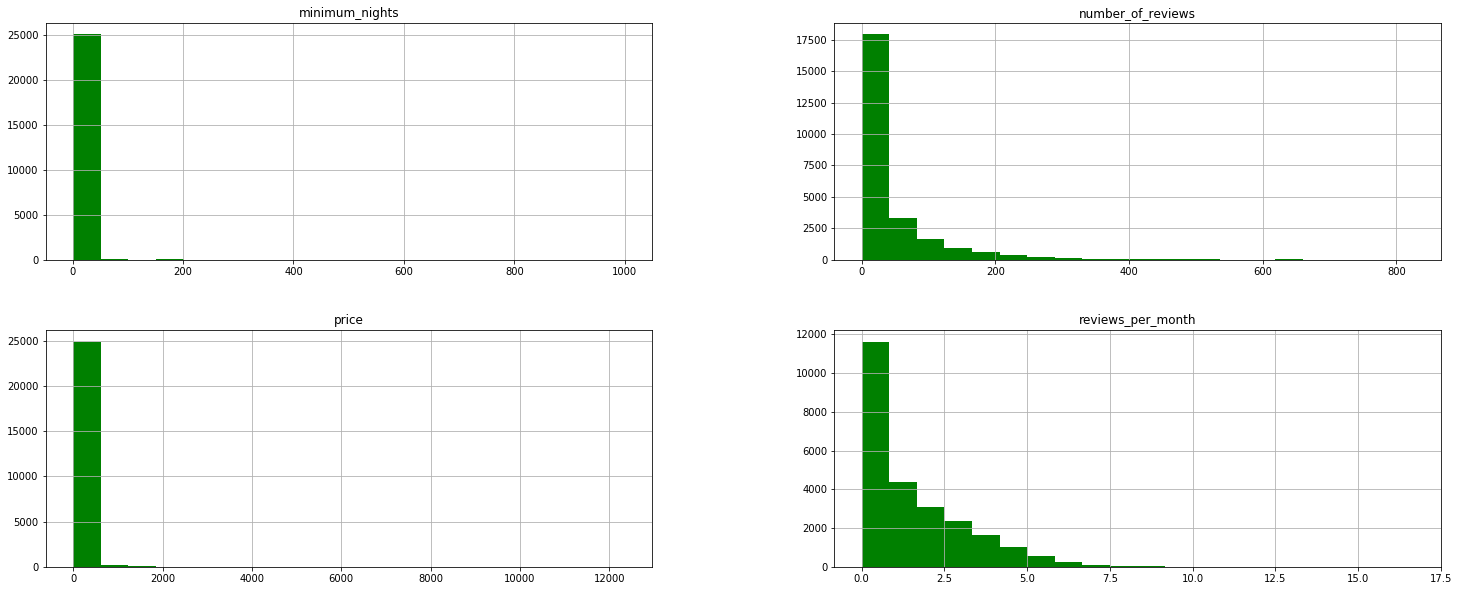

In [8]:
# plotar o histograma do número de reviews total
df[['price','reviews_per_month','number_of_reviews', 'minimum_nights']].hist(bins=20, figsize=(25,10), color='Green');

In [19]:
# Analise  estatistica
df[['number_of_reviews', 'reviews_per_month', 'price', 'minimum_nights']].describe()

,number_of_reviews,reviews_per_month,price,minimum_nights
count,25134.000000,25134.000000,25134.000000,25134.000000
mean,39.300947,1.539700,97.947561,2.820761
std,60.806113,1.652411,195.577414,10.546084
min,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.210000,48.000000,1.000000
50%,14.000000,1.000000,69.000000,2.000000
75%,50.000000,2.440000,100.000000,3.000000
max,825.000000,16.670000,12345.000000,1000.000000


Podemos verificar que:

**Number_of_reviews:** a maioria está entre 0 e 50 reviews, porém tem alguns com reviews acima de 600 e até mesmo 1 que chega a 800 reviews. Quanto maior a quantidade de reviews melhor.

**Reviews_per_month:** a  maioria está entre 0 e 2 reviews por mês, sendo que em torno de 500 hospedagens chegam a 5 reviews mensais. Existem poucos que tem média de reviews acima de 15 mensais. Quanto mair a média melhor.

**Price:** a maioria está abaixo de 100 euros. A mediana está em 69 euros.

**Minimum_nigths:** a mediana em 2 dias, e podemos considerar outliers acima de 15 dias.

Podemos verificar que com certeza temos um outlier no preço acima de 2000 euros. Pois 75% está abaixo de 100 euros.




Como queremos somente hospedagens com valor que fiquem mais proximos da mediana, vamos criar novo conjunto de dados filtrando o que nos interessa, objetivando assim obter hospedagens com valores mais medianos e que tenham maior quantidade de locação e de revisões.

### Fazendo a limpeza dos dados

Levando em consideração que **queremos uma hospedagem com valor mediano**, vamos criar um novo conjunto de dados desconsiderando aquelas entradas que estão fora da faixa que desejamos. 

Vamos selecionar as que tenham mais reviews totais e mensais e também as que ficam mais próximo do centro, que o tipo de hospedagem seja 'Private room' ou 'Entire home/apt' e que a localização que seja o mais próximo do centro.

In [10]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    18329
Private room        5740
Hotel room           682
Shared room          383
Name: room_type, dtype: int64

Aplicando os filtros e gerando ium novo dataset.

In [43]:
# Novo DF com dados filtrados
novo = df.loc[ (df.price > 50) & (df.price < 70) & 
              (df.number_of_reviews > 50) & (df.reviews_per_month >= 2) &
              (df.minimum_nights <= 7) &
              ((df.room_type == 'Entire home/apt') | (df.room_type == 'Private room')) &
              (df.neighbourhood_group == 'Lisboa') 
              # & (df.latitude > 38.71) & (df.latitude < 38.74) &
              #(df.longitude > -9.14) & (df.longitude < -9.12)
               ]
novo[['number_of_reviews', 'reviews_per_month', 'price']].describe()

,number_of_reviews,reviews_per_month,price
count,991.000000,991.000000,991.000000
mean,144.321897,3.743663,60.272452
std,80.204035,1.420391,4.690032
min,51.000000,2.000000,51.000000
25%,83.000000,2.680000,56.000000
50%,122.000000,3.460000,60.000000
75%,184.500000,4.460000,65.000000
max,520.000000,16.670000,69.000000



Analisando a planilha podemos ver que melhorou muito pois a quantidade mediana de reviews subiu 442% e a quantidade mensal tambem melhorou muito.


ANALISE | Antes | Depois | Aumento/Redução
--- | --- | --- | ---
entradas          | 25.134 | 991 | -96%
number_of_reviews | 14 | 122 | +871%
reviews_pre_month | 1  | 3,4 | +340%
price             | 69 | 60 | -13%

Agora temos dados mais próximos do nosso objetivo. Mas ainda falta mais analises para finalizarmos a seleção.


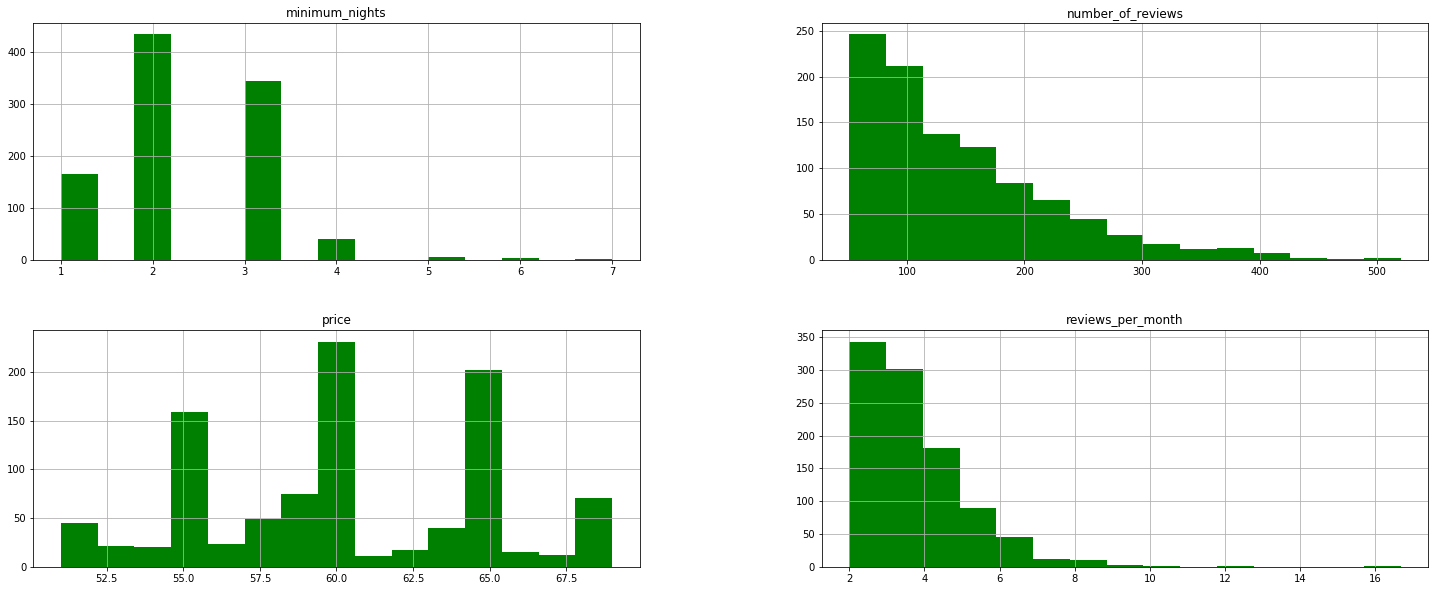

In [49]:
# após limpeza
novo[['price','reviews_per_month','number_of_reviews', 'minimum_nights']].hist(bins=15, figsize=(25,10), color='Green');

Agora podemos ver com mais clareza. A Mediana minima de noites são 2 noites e temos muitos hospedagens com valor mediano de 50 euros.

### Analisando preço médio.

Analisando preço médio por bairro, verificamos que a varição é pequena se compararmos com a variação da amostra original.


In [45]:
# ver preços por bairros, na média - 5 mais caras e 5 mais baratas
novo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)#[:10]

neighbourhood
Benfica                   69.000000
Lumiar                    64.500000
Alvalade                  61.500000
Santo Antnio              60.910448
Santa Maria Maior         60.667797
Estrela                   60.602740
Arroios                   60.600000
Penha de Frana            60.304348
So Vicente                60.231405
Campo de Ourique          60.230769
So Domingos de Benfica    60.000000
Misericrdia               59.870536
Parque das Naes           59.444444
Areeiro                   59.166667
Alcntara                  59.000000
Avenidas Novas            58.625000
Campolide                 58.000000
Belm                      57.941176
Ajuda                     57.428571
Olivais                   56.000000
Beato                     55.500000
Carnide                   55.000000
Name: price, dtype: float64

Vamos mostrar um mapa das hospedagens, e colorindo por seu preço, sendo o vermelho o mais barato e o azul escuro o mais caro.


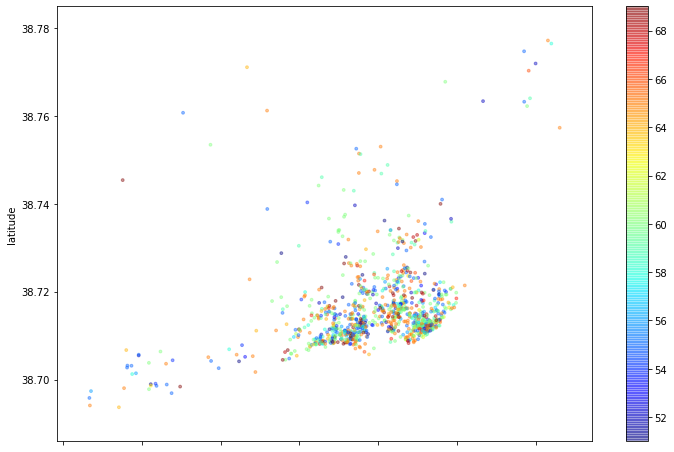

In [54]:
# plotar os imóveis pela latitude-longitude
novo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=novo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Como podemos verificar os dados normalmente vem com algumas variaveis contendo valores outliers e tambem valores ausentes. Muito importante fazer a limpeza antes de iniciar a analise exploratória.

Neste estudo de caso, fizemos varias limpesas e também uma seleção conforme a nossa necessidade de visualizar as hospedagens que consideramos mais adequadas.

Faltou analisar os reviews negativos, porém a amostra não disponibilzava esta informação.

Abaixo uma lista dos hospedagens com maior reviews que é o fator principal que consideramos para selecionar as hospedagens. 


In [0]:
# Apartamento mais avaliados
df_clean.sort_values(by="number_of_reviews", ascending=False)[:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1149,1745355,open space in Lisbon close airport,9186518,Andre,Lisboa,Olivais,38.76907,-9.11009,Entire home/apt,49,1,825,2019-09-24,11.45,1,153
2748,4689339,Double bed near Lisb airport(Blue),23427234,António,Loures,Moscavide e Portela,38.78431,-9.11202,Private room,22,1,658,2019-09-26,12.34,3,53
55,133734,BED & BREAKFAST WITH A VIEW! Sintra,656540,Marianne,Sintra,Colares,38.79621,-9.47342,Private room,26,1,645,2019-09-24,6.39,1,312
761,1085634,Cozy Flat at Bica/ Bairro Alto,5968047,Maria,Lisboa,Misericrdia,38.70926,-9.14607,Entire home/apt,40,1,642,2019-09-24,8.27,1,291
94,176153,The White House - Historical Center,842219,Inês & António,Lisboa,Misericrdia,38.70817,-9.14368,Entire home/apt,200,1,636,2019-09-16,6.42,2,215


Agora é um trabalho manual de selecionar a hospedagem definitiva, utilizando o proprio site do Aribnb e passando como parametro o id da hospedagem:

Para consultar a hospedagem, utilize este link: https://www.airbnb.com.br/rooms/1745355 lembrando de trocar o último código pelo ID da hospedagem.

